In [ ]:
from __future__ import print_function
from keras.preprocessing.text import Tokenizer

from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from keras.datasets import imdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflowjs as tfjs

In [ ]:
"""
Create DataLoading Section
Classes: 
1- Word of Affirmation
2- Acts of Service
3- Gifts
4- Time
5- Physical Touch
"""
df = pd.read_csv("train.csv",";",header=None)
df.head()
print(df[1])
print(np.array(df[1]))

In [ ]:
x_train = np.array(list(df[0]))
print("X len" ,x_train.shape)

y_train = np.array(df[1])
y_train = np.subtract(y_train,1)
print("Y len:", y_train.shape)
print(y_train)

assert(len(x_train)==y_train.shape[0])

In [85]:
"""
We must encode the word vectors with one hot encoding 
inorder to pass the values into the array
"""
t = Tokenizer()
t.fit_on_texts(x_train)
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_x = t.texts_to_sequences(x_train)
print(encoded_x)

[[4, 13, 80, 3, 20, 1, 24, 56, 5, 37, 1, 24, 16, 13, 150, 3, 7, 8, 151, 20, 37], [1, 9, 45, 17, 2, 152, 3, 12, 1, 153, 33, 154, 9, 155], [14, 4, 156, 3, 11, 157, 15, 81], [38, 2, 158, 15, 81, 7, 3], [2, 159, 25, 15, 160], [1, 45, 39, 2, 161, 162, 6, 57, 46], [21, 163, 26, 164, 40, 47, 22, 82, 18, 2], [80, 3, 1, 24, 27, 83, 1, 84, 13, 34, 7, 30, 31, 5, 165], [1, 9, 85, 86, 20, 1, 24, 22, 87, 20, 2, 34, 6, 88, 35, 12, 89, 166, 58, 167, 168, 13, 90, 4, 3], [5, 169, 2, 170, 7, 48, 171, 91, 26, 92, 93], [1, 8, 17, 2, 172, 173, 94, 16, 174, 175, 176], [4, 13, 177, 3, 49, 17, 178, 95, 179, 3, 18, 17, 180, 1, 24, 7, 30, 96, 20, 59], [1, 9, 50, 17, 2, 181, 16, 182, 3, 17, 89, 41, 7, 30, 56, 35, 60, 1, 49, 47, 97], [14, 4, 183, 39, 1, 34, 98, 61], [21, 22, 93, 40], [9, 8, 5, 37, 2, 184], [20, 27, 99, 185, 100, 6, 51], [1, 101, 2, 7, 49, 20, 2, 62, 5, 186, 187, 188, 102, 7, 3], [13, 103, 3, 1, 24, 56, 5, 37, 1, 24, 12, 189, 104, 190, 6, 191], [2, 63, 3, 22, 82, 18, 39, 1, 33, 2, 103, 3, 7, 30, 87

In [86]:
"""
Section to Prep the data before training 
"""
# cut texts after this number of words (among top max_features most common words)
maxlen = 50
batch_size = 32
print('Loading data...')

print(len(encoded_x), 'train sequences')
#print(len(x_test), 'test sequences')

print('Pad sequences (samples x time)')
x_train = sequence.pad_sequences(encoded_x, maxlen=maxlen)
#x_test = sequence.pad_sequences(x_test, maxlen=maxlen)
print('x_train shape:', x_train.shape)
#print('x_test shape:', x_test.shape)


Loading data...
104 train sequences
Pad sequences (samples x time)
x_train shape: (104, 50)


In [87]:
print('y_train shape:', y_train.shape)
#print('y_test shape:', y_test.shape)
y_train[10]

y_train shape: (104,)


0

In [88]:
"""
Build Model for Training
"""

model = Sequential([tf.keras.layers.Embedding(max_features, 40),
                   LSTM(40, dropout=0.2, recurrent_dropout=0.2),
                   Dense(10, activation='relu'),
                   Dense(5,activation='softmax')])

# try using different optimizers and different op

In [89]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [90]:
"""
Get Model Summary
"""
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_9 (Embedding)      (None, None, 40)          800000    
_________________________________________________________________
lstm_9 (LSTM)                (None, 40)                12960     
_________________________________________________________________
dense_14 (Dense)             (None, 10)                410       
_________________________________________________________________
dense_15 (Dense)             (None, 5)                 55        
Total params: 813,425
Trainable params: 813,425
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
104/104 [==============================] - 0s - loss: 0.0814 - acc: 0.9904     
Epoch 2/10
104/104 [==============================] - 0s - loss: 0.0234 - acc: 1.0000     
Epoch 3/10
104/104 [==============================] - 0s - loss: 0.0292 - acc: 1.0000     
Epoch 4/10
104/104 [==============================] - 0s - loss: 0.0264 - acc: 1.0000     
Epoch 5/10
104/104 [==============================] - 0s - loss: 0.0252 - acc: 1.0000     
Epoch 6/10
104/104 [==============================] - 0s - loss: 0.0219 - acc: 1.0000     
Epoch 7/10
104/104 [==============================] - 0s - loss: 0.0246 - acc: 1.0000     
Epoch 8/10
104/104 [==============================] - 0s - loss: 0.0228 - acc: 1.0000     
Epoch 9/10
104/104 [==============================] - 0s - loss: 0.0241 - acc: 1.0000     
Epoch 10/10
104/104 [==============================] - 0s - loss: 0.0210 - acc: 1.0000     


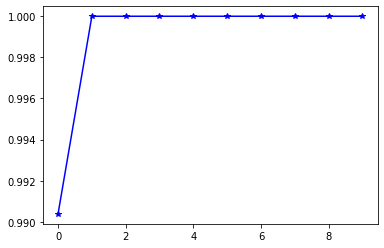

In [94]:
history = model.fit(x_train, y_train, epochs=10, batch_size=30).history
plt.plot(history['acc'], '-*', color='blue');
plt.show()


In [95]:
"""
Save the tensorlfow js model to be used in the browser
"""
tfjs.converters.save_leras_model(model,"weights/")

NameError: name 'tfjs' is not defined